In [82]:
from wpt_tools import wpt_tools

### Create instance of analysis and set initial variables

In [83]:
wpt_eval_ins = wpt_tools.wpt_eval()
rx_port = 2 # 1 or 2

### Import 2-port network data
options
- 'file' option: import touchstone file
- 'measure_pico' option: measure using picovna
    - parameters need to match cal file

In [84]:
mode = 'file'
#mode = 'measure_pico'

if mode == 'file':
    wpt_eval_ins.import_touchstone()
    #wpt_eval_ins.import_touchstone('./assets/100mm_TX_20mm_RX_75mm_D_CpCs.s2p')

if mode == 'measure_pico':
    # vna registry setting (it's either of these two)
    progid = "PicoControl2.PicoVNA_2"
    # progid = "PicoControl3.PicoVNA_3"

    # Export setting
    touchstone_export = 'export_touchstone/test'

    # Need to match calibration setup
    cal_file = '../sample_cal/1_to_10MHz.cal'
    start_f = 1e6 #[Hz]
    end_f = 10e6 #[Hz]
    sweep_points = 1001
    power_level = -10 #[dBm]
    RBW = 1e3 #[Hz]
    z0 = 50

    wpt_eval_ins.picoVNA_measure(cal_file=cal_file, start_f=start_f, end_f=end_f,\
        sweep_points=sweep_points, power_level=power_level, RBW=RBW, z0=z0, progid=progid)

    wpt_eval_ins.export_touchstone(touchstone_export)

C:/Users/Takuya/Documents/GitHub/Wireless-Miniscope/touchstone/square_qscr_25mm_scope1_CpCsRl_100mm_45deg.s2p


### Plot Z-parameters (full-range)

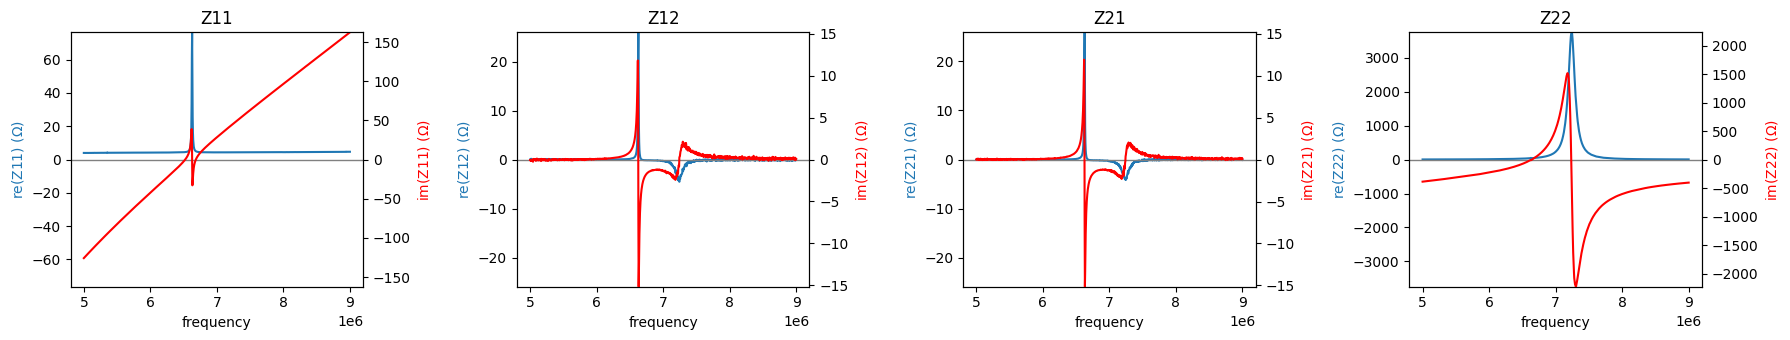

In [85]:
wpt_eval_ins.plot_z_full()

### Efficiency and optimal load analysis (for general 2-port networks)
Reference: Y. Narusue, et al., "Load optimization factors for analyzing the efficiency of wireless power transfer systems using two-port network parameters," IEICE ELEX, 2020.

Unstable when far from resonant frequency (probably because to S to Z conversion becomes unstable)

Target frequency: 6.632e+06
Maximum efficiency: 0.05
Optimum Re(Zload): 43.82
Optimum Im(Zload): -205.57


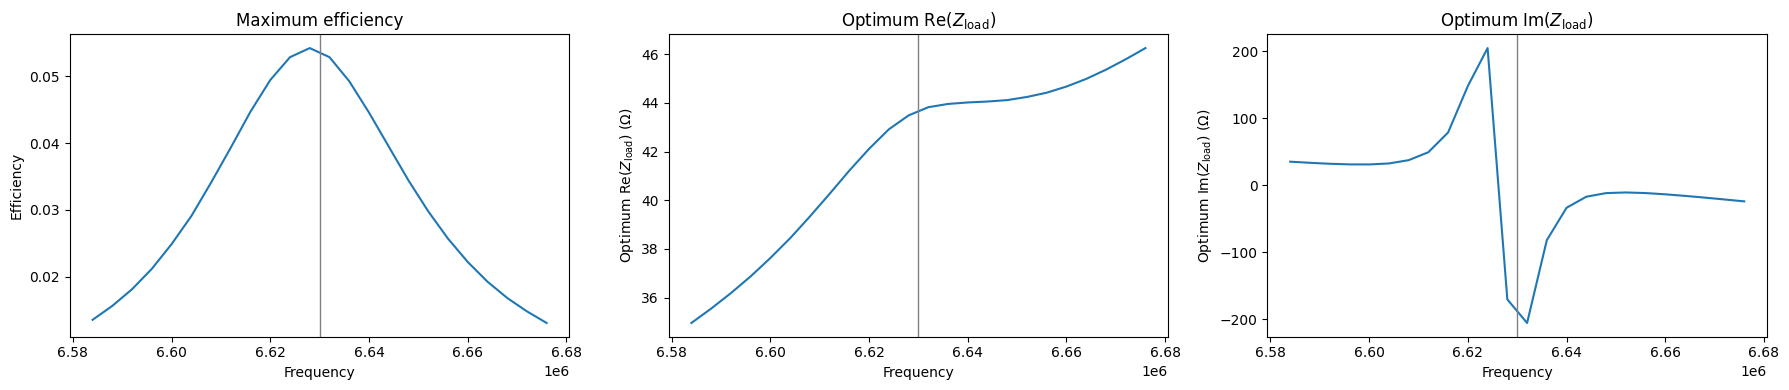

In [86]:
# For maximum efficiency analysis
target_f = 6.63e6
range_f = 1e5

wpt_eval_ins.set_f_target_range(target_f=target_f, range_f=range_f)
f_opt, eff_opt, r_opt, x_opt = wpt_eval_ins.efficiency_load_analysis(show_plot=1, rx_port=rx_port)

### Curve-fitting and Z-matrix plot (only for 2-port measurement of Series-Series LCR coupling)

R2 for fitting Ls1, Cs1: 0.887240
R2 for fitting Ls2, Cs2: 0.781060
Self impedance at target frequency

Re(Z11): 7.63e+01
Im(Z11): -8.25e+00

Re(Z22): 4.78e+01
Im(Z22) -1.10e+01

Fitting values assuming a pair of series LCR resonators

Ls1: 5.32e-06, Cs1: 1.10e-10, Rs1: 5.57e+00, f_1: 6.575e+06, Q_1 (approximate, @6.630e+06 Hz): 3.98e+01
Ls2: 8.04e-05, Cs2: 7.44e-12, Rs2: 1.01e+02, f_2: 6.508e+06, Q_2 (approximate, @6.630e+06 Hz): 3.30e+01
Lm: -1.38e-08, km: -0.001


(5.324983469390146e-06,
 1.1003053002034261e-10,
 array([5.56863563]),
 8.041601842332158e-05,
 7.436169540503635e-12,
 array([101.38144088]),
 array([-1.37963422e-08]))

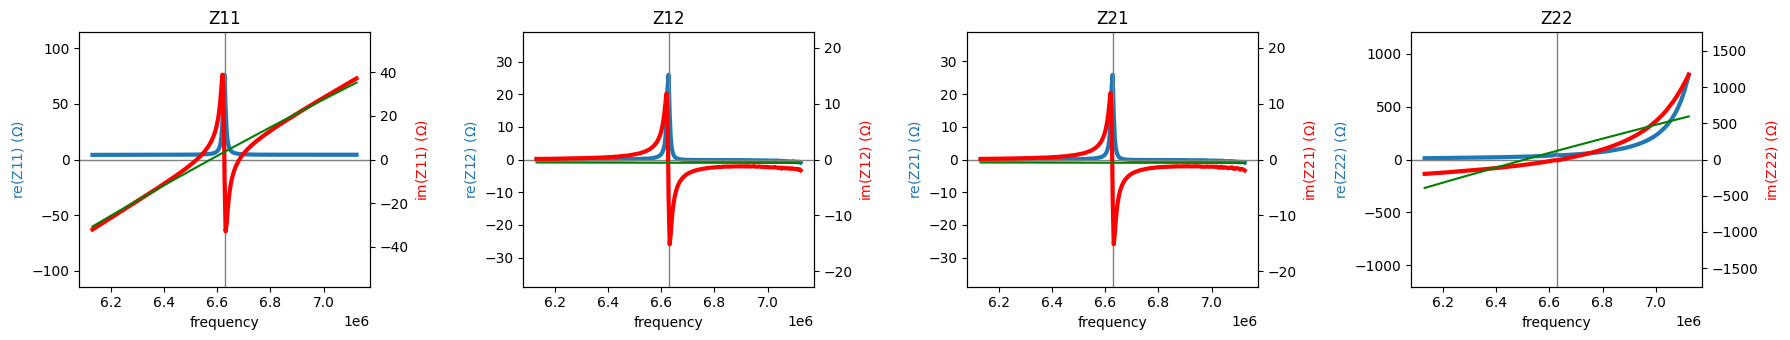

In [87]:
# For maximum efficiency analysis
target_f = 6.63e6
range_f = 1e6

wpt_eval_ins.set_f_target_range(target_f=target_f, range_f=range_f)
wpt_eval_ins.plot_z_narrow_fit()

### Optimal load visualization
Imura, "Wireless Power Transfer: Using Magnetic and Electric Resonance Coupling Techniques," Springer Singapore 2020.

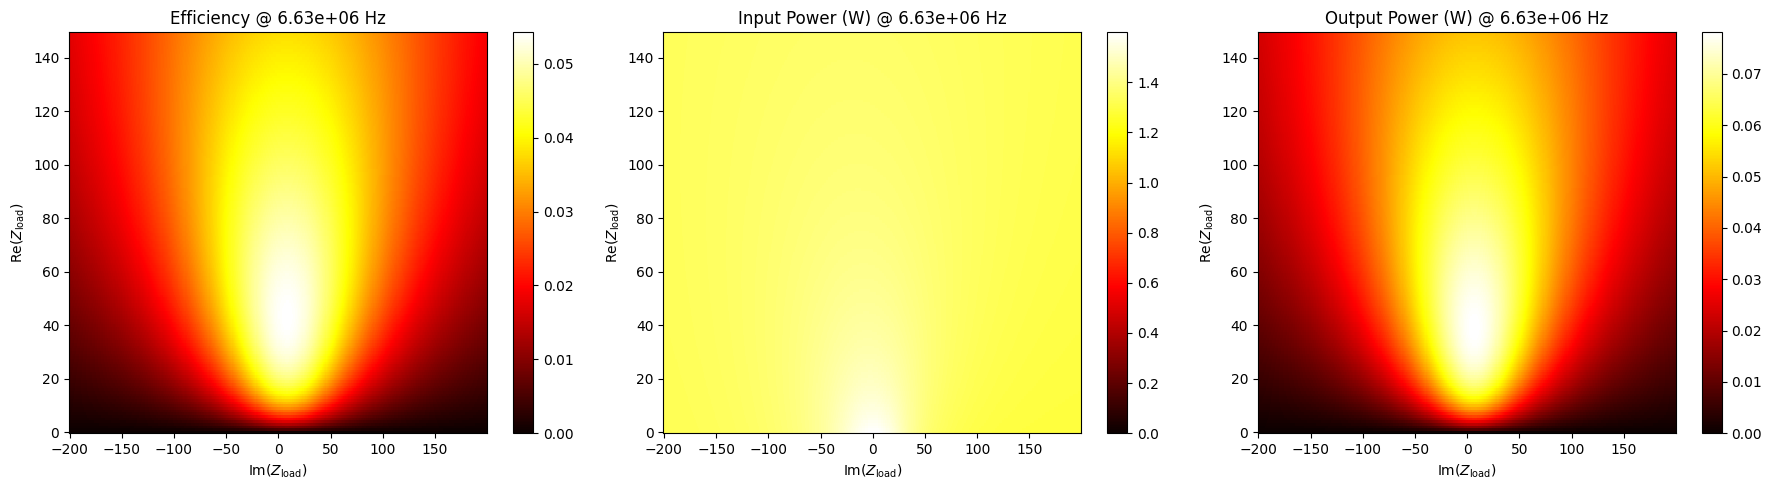

In [88]:
wpt_eval_ins.optimal_load_plot(min_rez=0.1, max_rez=150, step_rez=1,\
    min_imz=-200, max_imz=200, step_imz=1, input_voltage=10, rx_port=rx_port)

In [89]:
if 0:
    wpt_eval_ins.reset_network()
    wpt_eval_ins.plot_z_full()
    wpt_eval_ins.append_network(cascade_port=2, component='C', topology='parallel',value=2.16346680e-10, ESR=0)
    wpt_eval_ins.append_network(cascade_port=2, component='C', topology='series',value=4.54023861e-11, ESR=0)
    wpt_eval_ins.plot_z_full()
    wpt_eval_ins.optimal_load_plot(min_rez=0.1, max_rez=150, step_rez=1,\
        min_imz=-200, max_imz=200, step_imz=1, input_voltage=10, rx_port=rx_port)

### Capacitor filter calculator
![](./img/CpCsRltopology.png)

In [90]:
if 0:
    wpt_eval_ins.set_f_target_range(target_f=target_f, range_f=range_f)
    wpt_eval_ins.rxc_filter_calc(rx_port = rx_port, rload = 50, c_network = 'CpCsRl')